# DAML - BSU Skills Bootcamp 2025
## Problem statement:
### Are there identifiable features of students’ citation practices that we can use as insights for our teaching?

## ETL
### Extraction
    - Two undergraduate dissertation part 1 submissions. Excellent from 2023-24 and a upper mid-range from 2024-25.
    - References transformed into JSON using _anystyle.io_
        - TODO: create function that runs local Ruby script for _anystyle.io_ to allow batch processing of multiple scripts.
### Transform JSON into VOSViewer format
#### Lookup paperid as <<PK>> from _semanticscholar_ API  



In [90]:
# Let's see what the json output from anystyle.io looks like
import pandas as pd

maddie_df=pd.read_json('training2023_citations.json')
maddie_df.head(10)
# cleanup author field

#newdf = df.drop_duplicates()
#newdf.head(100)

# author field needs splitting into first and last name for each author
# more importantly, no DOI info which is the most important field for linking to other data sources

,author,title,note,language,type,issued,URL,editor,container-title,volume,publisher,page,issue,publisher-place,DOI,citation-number,edition,genre
0,"[{'family': 'Akbar', 'given': 'A.'}]",Diversity in publishing - still hideously midd...,Available at:,en,None,{'date-parts': [[2017]]},https://www.theguardian.com/books/2017/dec/09/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'family': 'Allen', 'given': 'A.'}]","'Third Generation Critical Theory: Benhabib, F...",NaN,en,chapter,{'date-parts': [[2010]]},NaN,"[{'family': 'Schrift', 'given': 'A.D.'}]",The History of Continental Philosophy,7.0,After Poststructuralism,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[{'literal': '-'}],Transitions and Transformations,NaN,en,book,NaN,NaN,NaN,NaN,NaN,Acumen and Chicago University Press,129– 148,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'family': 'News', 'given': 'American Library...","'""Julian is a Mermaid"" and ""Hurricane Child"" w...",28 January [Press release]. Available at:,en,None,{'date-parts': [[2019]]},https://www.ala.org/news/press-releases/2019/0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'family': 'Anderson', 'given': 'P.'}]",Children's Books and Creators of Color: BookTr...,Available at:,en,None,{'date-parts': [[2022]]},https://publishingperspectives.com/2022/12/aut...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"[{'family': 'Bishop', 'given': 'R.S.'}]","'Mirrors, Windows and Sliding Glass Doors'",Available at:,en,article-journal,{'date-parts': [[1990]]},https://scenicregional.org/wp-,NaN,Perspectives: Choosing and Using Books for the...,6.0,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
6,"[{'family': 'Blair', 'given': 'A.'}]",The True Feminists Were Hidden in Plain Sight:...,NaN,en,None,{'date-parts': [[2021]]},NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA. Northern Illinois,NaN,NaN,NaN,NaN
7,NaN,NaN,University. Available at:,en,None,NaN,https://huskiecommons.lib.niu.edu/studentengag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,[{'given': 'BookTrust'}],NaN,Julian is a Mermaid. Available at:,en,None,{'date-parts': [[2023]]},https://www.booktrust.org.uk/book/j/julian-is-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"[{'family': 'Braidotti', 'given': 'R.'}]",'A Theoretical Framework for the Critical Post...,Available at:,en,article-journal,{'date-parts': [[2019]]},https://doi.org/10.1177/0263276418771486,NaN,"Theory, Culture & Society",36.0,NaN,31–61,6,NaN,10.1177/0263276418771486,NaN,NaN,NaN


In [91]:
maddie_df = maddie_df.dropna(subset=['DOI'])

def get_paper_id(title):
	url = f'https://api.openalex.org/works?search={title}'
	response = requests.get(url)
	if response.status_code == 200:
		data = response.json()
		if 'data' in data and data['data']:
			return data['data'][0]['id']
	return None

maddie_df.head(100)

,author,title,note,language,type,issued,URL,editor,container-title,volume,publisher,page,issue,publisher-place,DOI,citation-number,edition,genre
9,"[{'family': 'Braidotti', 'given': 'R.'}]",'A Theoretical Framework for the Critical Post...,Available at:,en,article-journal,{'date-parts': [[2019]]},https://doi.org/10.1177/0263276418771486,NaN,"Theory, Culture & Society",36.0,NaN,31–61,6,NaN,10.1177/0263276418771486,NaN,NaN,NaN
13,"[{'family': 'Casey', 'given': 'K.'}, {'family'...",Sixty years of gender representation in childr...,Available at:,en,article-journal,{'date-parts': [[2021]]},https://doi.org/10.1371/journal.pone.0260566,NaN,PLoS ONE,16.0,NaN,NaN,12,NaN,10.1371/journal.pone.0260566,NaN,NaN,NaN
21,"[{'family': 'Coletta', 'given': 'J.'}]",'The Missing B Word: Compulsory Binarization a...,Available at:,en,article-journal,{'date-parts': [[2018]]},https://doi.org/10.1353/jeu.2018.0004,NaN,"Jeunesse: Young People, Texts, Cultures",10.0,NaN,85–108,1,NaN,10.1353/jeu.2018.0004,NaN,NaN,NaN
29,"[{'family': 'Bruijn. Y.', 'particle': 'De'}, {...",Ethnic diversity in Children’s books in the Ne...,Available at:,en,article-journal,{'date-parts': [[2021]]},NaN,NaN,Early Childhood Education Journal,49.0,NaN,413–423,3,NaN,10.1007/s10643-020-01080-2,NaN,NaN,NaN
36,"[{'family': 'Golafshani', 'given': 'N.'}]",'Understanding Reliability and Validity in Qua...,Available at:,en,article-journal,{'date-parts': [[2003]]},https://doi.org/10.46743/2160-,NaN,The Qualitative Report,8.0,NaN,597–606,4,NaN,10.46743/2160-,NaN,NaN,NaN
37,"[{'family': 'Gomez-Najarro', 'given': 'J.'}]",Children’s Intersecting Identities Matter: Bey...,Available at:,en,article-journal,{'date-parts': [[2020]]},https://doi.org/10.1007/s10583-019-09390-9,NaN,Children’s Literature in Education,51.0,NaN,392–410,3,NaN,10.1007/s10583-019-09390-9,NaN,NaN,NaN
40,NaN,NaN,Available at:,en,None,NaN,https://doi.org/10.1080/17405904.2017.1421243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/17405904.2017.1421243,186-203.,NaN,NaN
41,"[{'family': 'Hayden', 'given': 'H.E.'}, {'fami...",'Disrupting ableism: Strengths-based represent...,Available at:,en,article-journal,{'date-parts': [[2023]]},https://doi.org/10.1177/146879842091751,NaN,Journal of Early Childhood Literacy,23.0,NaN,236–261,2,NaN,10.1177/146879842091751,NaN,NaN,NaN
43,NaN,NaN,Available at:,en,None,NaN,https://doi.org/10.1080/19361653.2020.1779164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/19361653.2020.1779164,216.,NaN,NaN
44,"[{'family': 'Heinecken', 'given': 'D.'}]",Contesting Controlling Images: The Black Balle...,Available at:,en,article-journal,{'date-parts': [[2019]]},NaN,NaN,Children’s Literature in Education,50.0,NaN,297–314,3,NaN,10.1007/s10583-018-9345-y,NaN,NaN,NaN


In [92]:
# Function to get paperId based on title
def get_paper_id(title):
	url = f'https://api.openalex.org/works?search={title}'
	response = requests.get(url)
	if response.status_code == 200:
		data = response.json()
		if 'results' in data and data['results']:
			return data['results'][0]['id']
	return None

# Add id to each row in maddie_df
maddie_df['id'] = maddie_df['title'].apply(lambda x: get_paper_id(x) if pd.notnull(x) else None)


# remove blank id rows
#maddie_df = maddie_df.dropna(subset=['id'])




maddie_df.head(91)


C:\Users\admin\AppData\Local\Temp\ipykernel_71528\845560732.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maddie_df['id'] = maddie_df['title'].apply(lambda x: get_paper_id(x) if pd.notnull(x) else None)


,author,title,note,language,type,issued,URL,editor,container-title,volume,publisher,page,issue,publisher-place,DOI,citation-number,edition,genre,id
9,"[{'family': 'Braidotti', 'given': 'R.'}]",'A Theoretical Framework for the Critical Post...,Available at:,en,article-journal,{'date-parts': [[2019]]},https://doi.org/10.1177/0263276418771486,NaN,"Theory, Culture & Society",36.0,NaN,31–61,6,NaN,10.1177/0263276418771486,NaN,NaN,NaN,https://openalex.org/W2802076461
13,"[{'family': 'Casey', 'given': 'K.'}, {'family'...",Sixty years of gender representation in childr...,Available at:,en,article-journal,{'date-parts': [[2021]]},https://doi.org/10.1371/journal.pone.0260566,NaN,PLoS ONE,16.0,NaN,NaN,12,NaN,10.1371/journal.pone.0260566,NaN,NaN,NaN,https://openalex.org/W4200343821
21,"[{'family': 'Coletta', 'given': 'J.'}]",'The Missing B Word: Compulsory Binarization a...,Available at:,en,article-journal,{'date-parts': [[2018]]},https://doi.org/10.1353/jeu.2018.0004,NaN,"Jeunesse: Young People, Texts, Cultures",10.0,NaN,85–108,1,NaN,10.1353/jeu.2018.0004,NaN,NaN,NaN,https://openalex.org/W2888620450
29,"[{'family': 'Bruijn. Y.', 'particle': 'De'}, {...",Ethnic diversity in Children’s books in the Ne...,Available at:,en,article-journal,{'date-parts': [[2021]]},NaN,NaN,Early Childhood Education Journal,49.0,NaN,413–423,3,NaN,10.1007/s10643-020-01080-2,NaN,NaN,NaN,https://openalex.org/W3043247933
36,"[{'family': 'Golafshani', 'given': 'N.'}]",'Understanding Reliability and Validity in Qua...,Available at:,en,article-journal,{'date-parts': [[2003]]},https://doi.org/10.46743/2160-,NaN,The Qualitative Report,8.0,NaN,597–606,4,NaN,10.46743/2160-,NaN,NaN,NaN,https://openalex.org/W2113537253
37,"[{'family': 'Gomez-Najarro', 'given': 'J.'}]",Children’s Intersecting Identities Matter: Bey...,Available at:,en,article-journal,{'date-parts': [[2020]]},https://doi.org/10.1007/s10583-019-09390-9,NaN,Children’s Literature in Education,51.0,NaN,392–410,3,NaN,10.1007/s10583-019-09390-9,NaN,NaN,NaN,https://openalex.org/W2950850620
40,NaN,NaN,Available at:,en,None,NaN,https://doi.org/10.1080/17405904.2017.1421243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/17405904.2017.1421243,186-203.,NaN,NaN,None
41,"[{'family': 'Hayden', 'given': 'H.E.'}, {'fami...",'Disrupting ableism: Strengths-based represent...,Available at:,en,article-journal,{'date-parts': [[2023]]},https://doi.org/10.1177/146879842091751,NaN,Journal of Early Childhood Literacy,23.0,NaN,236–261,2,NaN,10.1177/146879842091751,NaN,NaN,NaN,https://openalex.org/W2732730595
43,NaN,NaN,Available at:,en,None,NaN,https://doi.org/10.1080/19361653.2020.1779164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/19361653.2020.1779164,216.,NaN,NaN,None
44,"[{'family': 'Heinecken', 'given': 'D.'}]",Contesting Controlling Images: The Black Balle...,Available at:,en,article-journal,{'date-parts': [[2019]]},NaN,NaN,Children’s Literature in Education,50.0,NaN,297–314,3,NaN,10.1007/s10583-018-9345-y,NaN,NaN,NaN,https://openalex.org/W2791565878


In [94]:
#remove the 'https://openalex.org/' from the id field
maddie_df['id'] = maddie_df['id'].apply(lambda x: x.split('/')[-1] if x is not None else None)

maddie_df.head(91)

C:\Users\admin\AppData\Local\Temp\ipykernel_71528\376663271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maddie_df['id'] = maddie_df['id'].apply(lambda x: x.split('/')[-1] if x is not None else None)


,author,title,note,language,type,issued,URL,editor,container-title,volume,publisher,page,issue,publisher-place,DOI,citation-number,edition,genre,id
9,"[{'family': 'Braidotti', 'given': 'R.'}]",'A Theoretical Framework for the Critical Post...,Available at:,en,article-journal,{'date-parts': [[2019]]},https://doi.org/10.1177/0263276418771486,NaN,"Theory, Culture & Society",36.0,NaN,31–61,6,NaN,10.1177/0263276418771486,NaN,NaN,NaN,W2802076461
13,"[{'family': 'Casey', 'given': 'K.'}, {'family'...",Sixty years of gender representation in childr...,Available at:,en,article-journal,{'date-parts': [[2021]]},https://doi.org/10.1371/journal.pone.0260566,NaN,PLoS ONE,16.0,NaN,NaN,12,NaN,10.1371/journal.pone.0260566,NaN,NaN,NaN,W4200343821
21,"[{'family': 'Coletta', 'given': 'J.'}]",'The Missing B Word: Compulsory Binarization a...,Available at:,en,article-journal,{'date-parts': [[2018]]},https://doi.org/10.1353/jeu.2018.0004,NaN,"Jeunesse: Young People, Texts, Cultures",10.0,NaN,85–108,1,NaN,10.1353/jeu.2018.0004,NaN,NaN,NaN,W2888620450
29,"[{'family': 'Bruijn. Y.', 'particle': 'De'}, {...",Ethnic diversity in Children’s books in the Ne...,Available at:,en,article-journal,{'date-parts': [[2021]]},NaN,NaN,Early Childhood Education Journal,49.0,NaN,413–423,3,NaN,10.1007/s10643-020-01080-2,NaN,NaN,NaN,W3043247933
36,"[{'family': 'Golafshani', 'given': 'N.'}]",'Understanding Reliability and Validity in Qua...,Available at:,en,article-journal,{'date-parts': [[2003]]},https://doi.org/10.46743/2160-,NaN,The Qualitative Report,8.0,NaN,597–606,4,NaN,10.46743/2160-,NaN,NaN,NaN,W2113537253
37,"[{'family': 'Gomez-Najarro', 'given': 'J.'}]",Children’s Intersecting Identities Matter: Bey...,Available at:,en,article-journal,{'date-parts': [[2020]]},https://doi.org/10.1007/s10583-019-09390-9,NaN,Children’s Literature in Education,51.0,NaN,392–410,3,NaN,10.1007/s10583-019-09390-9,NaN,NaN,NaN,W2950850620
40,NaN,NaN,Available at:,en,None,NaN,https://doi.org/10.1080/17405904.2017.1421243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/17405904.2017.1421243,186-203.,NaN,NaN,None
41,"[{'family': 'Hayden', 'given': 'H.E.'}, {'fami...",'Disrupting ableism: Strengths-based represent...,Available at:,en,article-journal,{'date-parts': [[2023]]},https://doi.org/10.1177/146879842091751,NaN,Journal of Early Childhood Literacy,23.0,NaN,236–261,2,NaN,10.1177/146879842091751,NaN,NaN,NaN,W2732730595
43,NaN,NaN,Available at:,en,None,NaN,https://doi.org/10.1080/19361653.2020.1779164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/19361653.2020.1779164,216.,NaN,NaN,None
44,"[{'family': 'Heinecken', 'given': 'D.'}]",Contesting Controlling Images: The Black Balle...,Available at:,en,article-journal,{'date-parts': [[2019]]},NaN,NaN,Children’s Literature in Education,50.0,NaN,297–314,3,NaN,10.1007/s10583-018-9345-y,NaN,NaN,NaN,W2791565878


In [149]:
import pandas as pd
import json
import requests
from pyalex import Works

# Assuming maddie_df is already loaded as a pandas DataFrame
# Example: maddie_df = pd.read_csv('path_to_csv_file.csv')

# Initialize dictionaries to store OpenAlex IDs and their referenced_by and cited_by IDs
referenced_by_dict = {}
cited_by_dict = {}

# Iterate over each OpenAlex ID in the DataFrame
for openalex_id in maddie_df['id']:
    # Lookup information on openalex.org using pyalex library
    work = Works(openalex_id).get()
    
    # Extract 'referenced_works' OpenAlex IDs
    if 'referenced_works' in work:
        referenced_by_dict[openalex_id] = work['referenced_works']
    
    # Extract 'cited_by_api_url' OpenAlex IDs
    if 'cited_by_api_url' in work:
        cited_by_api_url = work['cited_by_api_url']
        response = requests.get(cited_by_api_url)
        if response.status_code == 200:
            cited_by_work = response.json()
            if 'results' in cited_by_work:
                cited_by_dict[openalex_id] = [cited['id'] for cited in cited_by_work['results']]

# Print the dictionaries of OpenAlex IDs and their referenced_by and cited_by IDs
print("Referenced by dictionary:", referenced_by_dict)
print("Cited by dictionary:", cited_by_dict)

Referenced by dictionary: {'W2802076461': ['https://openalex.org/W1601400566', 'https://openalex.org/W1602775671', 'https://openalex.org/W175562627', 'https://openalex.org/W1976345684', 'https://openalex.org/W1985692482', 'https://openalex.org/W1998119680', 'https://openalex.org/W2003007843', 'https://openalex.org/W2004439802', 'https://openalex.org/W2017430530', 'https://openalex.org/W2027046055', 'https://openalex.org/W2028769438', 'https://openalex.org/W2155346182', 'https://openalex.org/W2164501533', 'https://openalex.org/W2206497086', 'https://openalex.org/W2319173765', 'https://openalex.org/W2333736089', 'https://openalex.org/W2545960929', 'https://openalex.org/W2583082295', 'https://openalex.org/W2798968830', 'https://openalex.org/W2997052055', 'https://openalex.org/W3146083582', 'https://openalex.org/W4206675716', 'https://openalex.org/W4206833477', 'https://openalex.org/W4207017369', 'https://openalex.org/W4210778009', 'https://openalex.org/W4210913059', 'https://openalex.org/

In [150]:
#remove the 'https://openalex.org/' from the dictionary values
referenced_by_dict = {key: [x.split('/')[-1] for x in value] for key, value in referenced_by_dict.items()}
cited_by_dict = {key: [x.split('/')[-1] for x in value] for key, value in cited_by_dict.items()}

In [151]:
referenced_by_dict

{'W2802076461': ['W1601400566',
  'W1602775671',
  'W175562627',
  'W1976345684',
  'W1985692482',
  'W1998119680',
  'W2003007843',
  'W2004439802',
  'W2017430530',
  'W2027046055',
  'W2028769438',
  'W2155346182',
  'W2164501533',
  'W2206497086',
  'W2319173765',
  'W2333736089',
  'W2545960929',
  'W2583082295',
  'W2798968830',
  'W2997052055',
  'W3146083582',
  'W4206675716',
  'W4206833477',
  'W4207017369',
  'W4210778009',
  'W4210913059',
  'W4214713697',
  'W4230653741',
  'W4231300224',
  'W4233394093',
  'W4233928894',
  'W4238630695',
  'W4239533721',
  'W4240497754',
  'W4241786887',
  'W4242053761',
  'W4243732951',
  'W4243761327',
  'W4243937523',
  'W4244036983',
  'W4244415112',
  'W4244791615',
  'W4247147451',
  'W4247676128',
  'W4248411996',
  'W4248436120',
  'W4248481358',
  'W4248624216',
  'W4250693973',
  'W4254274555',
  'W4254999364',
  'W4321383216',
  'W612270436',
  'W621751509'],
 'W4200343821': ['W1524894750',
  'W1575133874',
  'W1604322211',
  '

In [152]:
cited_by_dict

{'W2802076461': ['W2938336924',
  'W2903643311',
  'W3130002813',
  'W2901432668',
  'W2942316574',
  'W2969719332',
  'W3119294619',
  'W3120822143',
  'W2803386772',
  'W2915810185',
  'W3043787412',
  'W3033870437',
  'W3184872422',
  'W3206985319',
  'W3172596771',
  'W3160601075',
  'W4214556435',
  'W4288456916',
  'W4316498835',
  'W4360975578',
  'W4366547369',
  'W4392233772',
  'W4393316041',
  'W4396873099',
  'W4400165096'],
 'W4200343821': ['W4406598630',
  'W4407129805',
  'W4389491840',
  'W4390726747',
  'W4378894444',
  'W4391109062',
  'W4385809704',
  'W4320519478',
  'W4213101520',
  'W4393390747',
  'W4393997732',
  'W4396726857',
  'W4400776962',
  'W4401500803',
  'W4402402659',
  'W4403103863',
  'W4403986484',
  'W4405288506',
  'W4405809131',
  'W4385633964',
  'W4390755884',
  'W4321604081',
  'W4378627738',
  'W4388808125',
  'W4388829808'],
 'W2888620450': ['W2967229736', 'W4404778922'],
 'W3043247933': ['W4220752194',
  'W4400382919',
  'W4229373166',
  'W

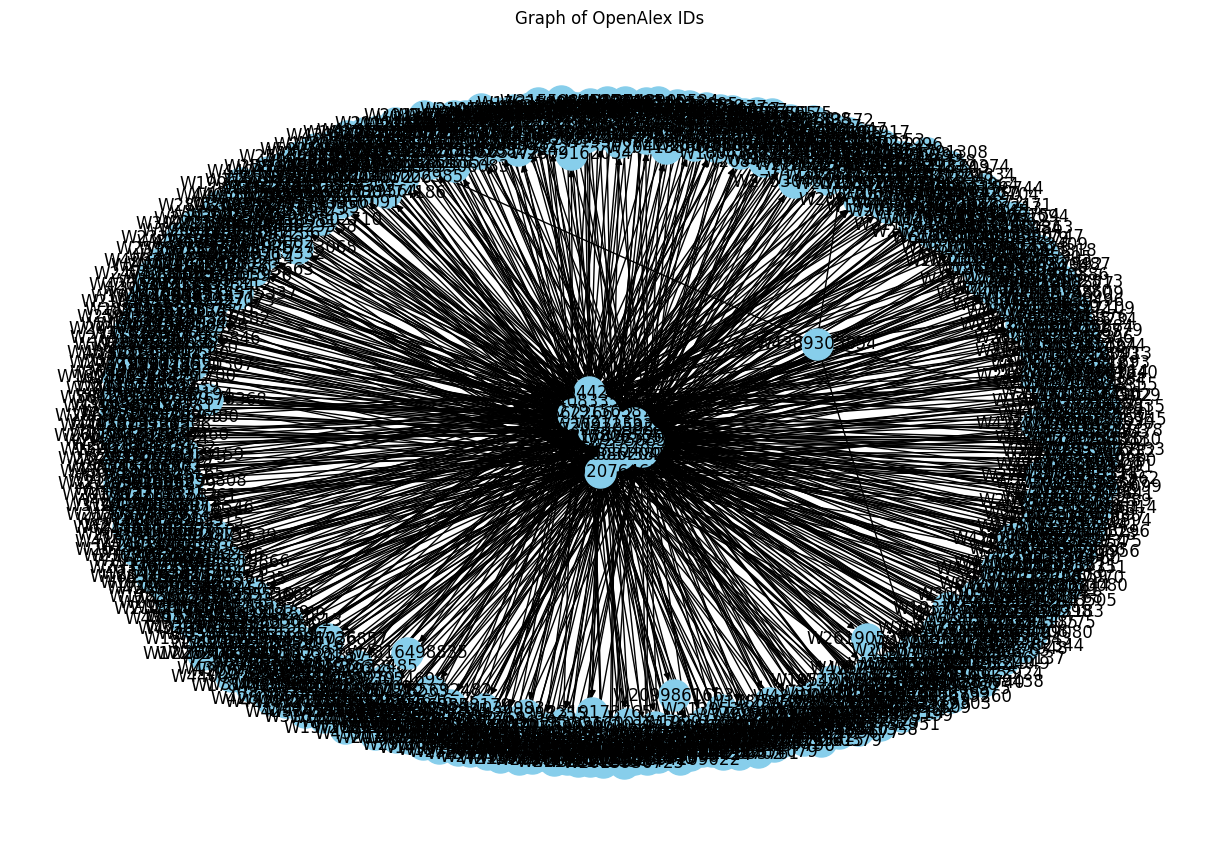

In [146]:
import networkx as nx
import matplotlib.pyplot as plt

# take the two dictionaries and create a graph whose nodes are the dictionary keys and values. create an edge between nodes if the value is associated with a  key
# Create a directed graph
# Create a graph
G = nx.DiGraph()

# Add nodes and edges for referenced_by_dict
for key, values in referenced_by_dict.items():
    if not G.has_node(key):
        G.add_node(key)
    for value in values:
        if not G.has_node(value):
            G.add_node(value)
        G.add_edge(key, value)

# Add nodes and edges for cited_by_dict
for key, values in cited_by_dict.items():
    if not G.has_node(key):
        G.add_node(key)
    for value in values:
        if not G.has_node(value):
            G.add_node(value)
        G.add_edge(key, value)

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", pos=nx.spring_layout(G))
plt.title("Graph of OpenAlex IDs")
plt.show()


In [135]:
# test_refs = get_references("https://api.openalex.org/works?filter=referenced_works:W2802076461") # 54 / 776

referenced_by_ids = []
cited_by_ids = []

# Lookup information on openalex.org using pyalex library
work = Works('W2802076461').get()

# Extract 'referenced_by' OpenAlex IDs
if 'referenced_works' in work:
    referenced_by_ids.extend(work['referenced_works'])

# Extract 'cited_by_api_url' OpenAlex IDs
if 'cited_by_api_url' in work:
    cited_by_api_url = work['cited_by_api_url']
    response = requests.get(cited_by_api_url)
    if response.status_code == 200:
        cited_by_work = response.json()
        if 'results' in cited_by_work:
            cited_by_ids.extend([cited['id'] for cited in cited_by_work['results']])

print("Referenced by:", len(referenced_by_ids))
print("Cited by:", len(cited_by_ids))

Referenced by: 54
Cited by: 25
